In [ ]:
!pip install nltk

In [ ]:
#https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

In [ ]:
#Loading NLTK
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize
text="""Hello Ms. Priya, how are you doing today? Did you have breakfast? The weather is great today. You shouldn't eat more carbs"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Ms. Priya, how are you doing today?', 'Did you have breakfast?', 'The weather is great today.', "You shouldn't eat more carbs"]


In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Ms.', 'Priya', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'Did', 'you', 'have', 'breakfast', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'You', 'should', "n't", 'eat', 'more', 'carbs']


In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 24 samples and 27 outcomes>


In [ ]:
fdist.most_common(2)

[('you', 2), ('today', 2)]

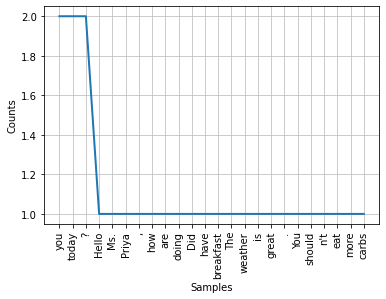

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'ma', 'hers', 'your', 'is', 'ours', 'few', 'had', 'and', 'until', 'if', 'then', 'm', 'he', 'where', 'doesn', 'this', 'being', 'between', 'shan', 'nor', "won't", 'there', 'after', 'with', 'no', 'them', "weren't", 'do', "that'll", 'were', 'their', 'above', "didn't", 'myself', 'itself', 'most', 'can', 'himself', 'by', 'up', 'herself', 'or', "don't", 'now', 'you', 'very', 'to', 'on', 'they', 'his', 'him', 'but', 'any', 'have', 'into', 'should', 'hasn', 'wouldn', 'here', 'further', 'only', 'own', 'y', "you'd", "doesn't", 'be', "she's", 'again', "you'll", 'each', 'both', 'of', 'weren', 'needn', 'before', 'how', 'too', 'all', 'been', 's', 'ourselves', 'yours', "it's", 'who', 've', 'because', 'doing', 'our', 'a', 'was', 'yourself', 'out', "needn't", 'what', 'those', 'haven', 'it', "hadn't", 'for', 'the', 'against', 'aren', 'she', 'theirs', 'hadn', "you're", "shouldn't", 'does

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

NameError: ignored

In [ ]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Lemmatized Word: fly
Stemmed Word: fli


In [ ]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

In [ ]:
tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [ ]:

nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

In [ ]:
# Import pandas
import pandas as pd

In [ ]:
data=pd.read_csv('./train.tsv', sep='\t')

In [ ]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

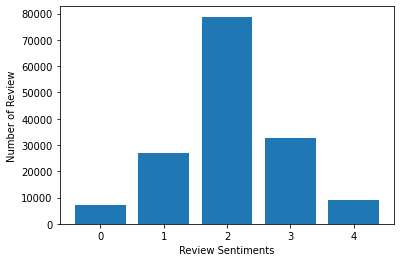

In [ ]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

ValueError: ignored